In [1]:
pwd


'C:\\Users\\Stephen Nishanth\\Desktop\\3rd semester notes\\Internship Project'

In [2]:
import pandas as pd# Importing all libraries required in this notebook
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

In [3]:
s_data = pd.read_csv("http://bit.ly/w-data")# Reading data from remote link
print("Data imported successfully")
s_data.describe()
s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


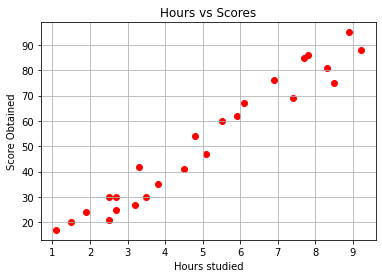

In [4]:
x=s_data['Hours']# Plotting the distribution of scores
y=s_data['Scores']
plt.scatter(x,y, label='Data points', color='Red',marker='o')
plt.xlabel('Hours studied')
plt.ylabel('Score Obtained')
plt.title('Hours vs Scores')
plt.grid()

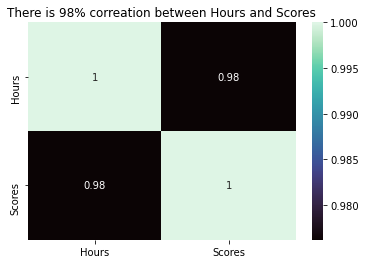

There is 98% correation between Hours and Scores


In [5]:
relation=s_data.corr()#Relation
sns.heatmap(relation,annot=True, cmap='mako')
plt.title('There is 98% correation between Hours and Scores')
plt.show()
print('There is 98% correation between Hours and Scores')

In [6]:
X = s_data.iloc[:, :-1].values#Splitting data  
y = s_data.iloc[:, 1].values  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [7]:
from sklearn.linear_model import LinearRegression# Importing Linear Regression Model  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


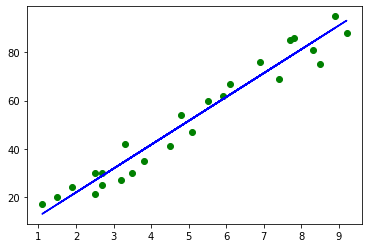

In [8]:
line = regressor.coef_*X+regressor.intercept_# Plotting the regression line
plt.scatter(X, y, color='green' )# Plotting for the test data
plt.plot(X, line, color='blue')
plt.show()

In [9]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})# Comparing Actual vs Predicted  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


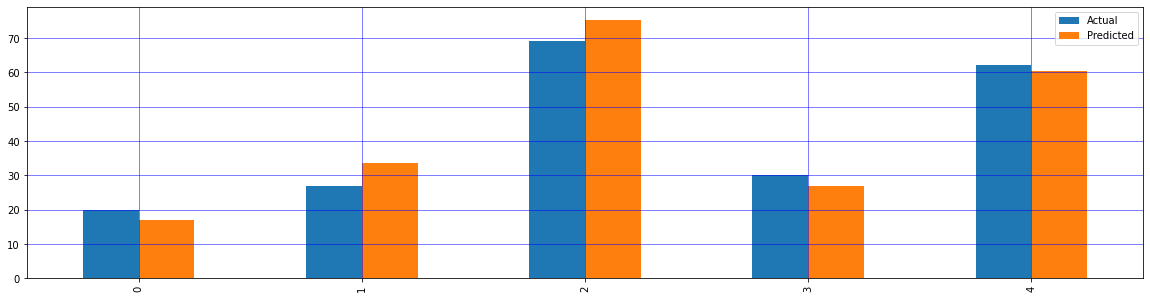

In [11]:
graph=df.head()#Graph Comparsion
graph.plot(kind='bar',figsize=(20,5))
plt.grid(which='both',color='blue',linestyle='-',linewidth=0.5)
plt.show()


In [12]:
hours = 9.25#Predicting Score of a student studied 9.25 hours
print("No of Hours = {}".format(hours))
print("Predicted Score = ",regressor.predict(np.array(hours).reshape(1,-1))[0])

No of Hours = 9.25
Predicted Score =  93.69173248737539


In [13]:
from sklearn import metrics#Evaluating the performane of the model  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
